<a href="https://colab.research.google.com/github/sumukhbhat12/Tensor-Flow-Course-FreeCodeCamp/blob/main/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

# Dataset :  CIFAR10

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

https://www.tensorflow.org/datasets/catalog/cifar10

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

Normalize the dataset

In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Classes

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

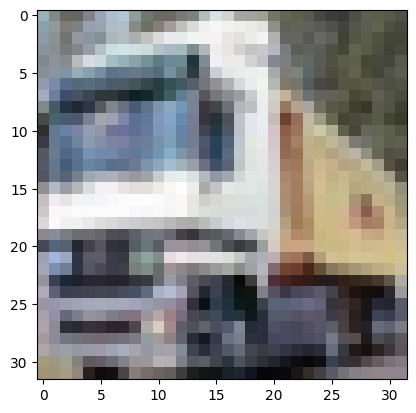

In [7]:
plt.imshow(train_images[1])

Convolution Base

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Adding the Dense Layers

In [10]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Training

SparseCategoricalCrossentropy doesn't require one hot encoding

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [13]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 87s 54ms/step - loss: 1.5270 - accuracy: 0.4405 - val_loss: 1.3234 - val_accuracy: 0.5276
Epoch 2/10
1563/1563 [==============================] - 82s 53ms/step - loss: 1.1771 - accuracy: 0.5837 - val_loss: 1.0753 - val_accuracy: 0.6213
Epoch 3/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0266 - accuracy: 0.6361 - val_loss: 0.9899 - val_accuracy: 0.6542
Epoch 4/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.9260 - accuracy: 0.6765 - val_loss: 0.9466 - val_accuracy: 0.6717
Epoch 5/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.8536 - accuracy: 0.7023 - val_loss: 0.9151 - val_accuracy: 0.6847
Epoch 6/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.7955 - accuracy: 0.7217 - val_loss: 0.8742 - val_accuracy: 0.6999
Epoch 7/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.7405 - accuracy: 0.7404 - val_loss: 0.9165 -

Evaluating the model

In [14]:
_, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

313/313 [==============================] - 5s 17ms/step - loss: 0.8414 - accuracy: 0.7172
0.717199981212616


predicting

In [23]:
def get_predictions(index):
  image = test_images[index]
  label = test_labels[index]
  pred = model.predict(image.reshape((-1,32,32,3)))
  print("Actual : ", class_names[label[0]])
  print("Predicted : ", class_names[np.argmax(pred)])
  plt.imshow(image)

1/1 [==============================] - 0s 26ms/step
Actual :  cat
Predicted :  cat


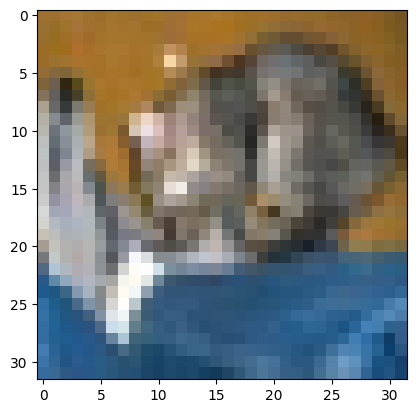

In [25]:
get_predictions(0)

1/1 [==============================] - 0s 39ms/step
Actual :  ship
Predicted :  ship


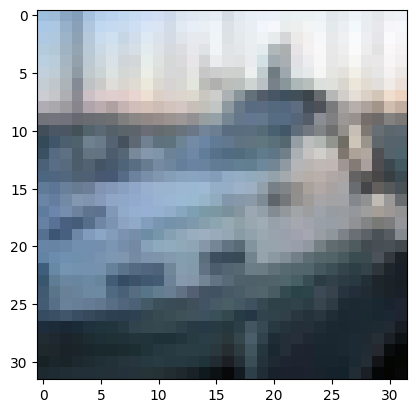

In [26]:
get_predictions(2)

1/1 [==============================] - 0s 74ms/step
Actual :  dog
Predicted :  dog


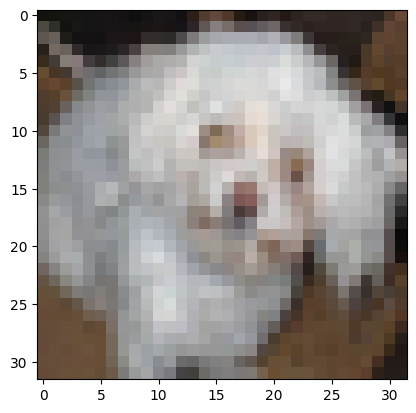

In [28]:
get_predictions(1000)

1/1 [==============================] - 0s 46ms/step
Actual :  ship
Predicted :  automobile


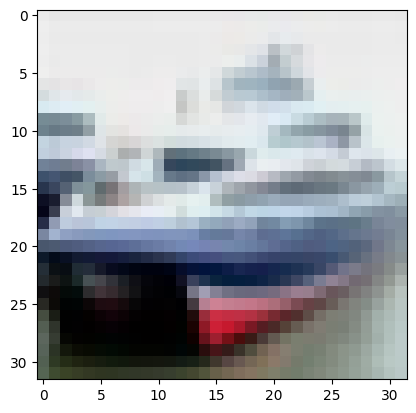

In [29]:
get_predictions(1)